In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Read the data from the text file
with open("/content/drive/MyDrive/Classroom/IA048 Turma A - 1s2024/Atividade_2/train/X_train.txt", "r") as f:
  data = f.readlines()

# Create a list of lists, where each inner list represents a row in the dataframe
data_list = [line.split() for line in data]

# Create the dataframe
df_X_train = pd.DataFrame(data_list, columns=range(561))

In [5]:
# Read the data from the text file
with open("/content/drive/MyDrive/Classroom/IA048 Turma A - 1s2024/Atividade_2/train/y_train.txt", "r") as f:
  data = f.readlines()

# Create a list of lists, where each inner list represents a row in the dataframe
data_list = [line.split() for line in data]

# Create the dataframe
df_y_train = pd.DataFrame(data_list, columns=range(1))

In [6]:
# Read the data from the text file
with open("/content/drive/MyDrive/Classroom/IA048 Turma A - 1s2024/Atividade_2/test/X_test.txt", "r") as f:
  data = f.readlines()

# Create a list of lists, where each inner list represents a row in the dataframe
data_list = [line.split() for line in data]

# Create the dataframe
df_X_test = pd.DataFrame(data_list, columns=range(561))

# Read the data from the text file
with open("/content/drive/MyDrive/Classroom/IA048 Turma A - 1s2024/Atividade_2/test/y_test.txt", "r") as f:
  data = f.readlines()

# Create a list of lists, where each inner list represents a row in the dataframe
data_list = [line.split() for line in data]

# Create the dataframe
df_y_test = pd.DataFrame(data_list, columns=range(1))

In [7]:
print(df_y_train)

      0
0     5
1     5
2     5
3     5
4     5
...  ..
7347  2
7348  2
7349  2
7350  2
7351  2

[7352 rows x 1 columns]


In [8]:
# prompt: Conte quantos valores tem de cada valor diferente de df_y_train

df_y_train.value_counts()


6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [9]:
# # prompt: Use o método de KNN com esquema de validação cruzada para treinar o modelo com df_X_train, df_y_train, e depois prediza o conjunto de testes com df_x_test

# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier

# # Define o classificador KNN com 3 vizinhos
# knn = KNeighborsClassifier(n_neighbors=3)

# # Realiza a validação cruzada com 5 folds
# scores = cross_val_score(knn, df_X_train, df_y_train, cv=5, scoring='accuracy')

# # Imprime a média das acurácias
# print("Acurácia média:", scores.mean())

# # Treina o modelo com todo o conjunto de treinamento
# knn.fit(df_X_train, df_y_train)

# # Faz a predição no conjunto de teste
# predictions = knn.predict(df_X_test)

# # Imprime as predições
# print(predictions)


In [10]:
# prompt: Eu quero treinar o  modelo usando validação cruzada e KNN, mas não use from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score


# Define o número de folds para a validação cruzada
num_folds = 10
k_max = 31
metrics = []
knn_vector = []

for k in range(1, k_max):
  # Cria um objeto KFold para dividir os dados em folds
  kf = KFold(n_splits=num_folds)
  knn = KNeighborsClassifier(n_neighbors=k)

  accuracy = []
  balanced_accuracy = []
  f1 = []
  # Itera sobre os folds
  for train_index, val_index in kf.split(df_X_train):
    # Separa os dados de treino e teste para o fold atual
    X_train, X_val = df_X_train.iloc[train_index], df_X_train.iloc[val_index]
    y_train, y_val = df_y_train.iloc[train_index], df_y_train.iloc[val_index]

    print("Indices de treinamento e validação: ", train_index, val_index)

    # Treina o modelo com os dados de treino do fold atual
    knn.fit(X_train, y_train)

    # Calcula metricas do modelo no conjunto de teste do fold atual
    y_pred_val = knn.predict(X_val)
    f1.append(f1_score(y_val, y_pred_val, average='macro'))
    balanced_accuracy.append(balanced_accuracy_score(y_val, y_pred_val))
    accuracy.append(accuracy_score(y_val, y_pred_val))

  metrics.append([np.array(f1).mean(),np.array(balanced_accuracy).mean(),np.array(accuracy).mean()])
  knn_vector.append(knn)

Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [ 736  737  738 ... 7349 7350 7351] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 22

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [ 736  737  738  739  740  741  742  743  744  745  746  747  748  749
  750  751  752  753  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  780  781  782  783  784  785  786  787  788  789  790  791
  792  793  794  795  796  797  798  799  800  801  802  803  804  805
  806  807  808  809  810  811  812  813  814  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830  831  832  833
  834  835  836  837  838  839  840  841  842  843  844  845  846  847
  848  849  850  851  852  853  854  855  856  857  858  859  860  861
  862  863  864  865  866  867  868  869  870  871  872  873  874  875
  876  877  878  879  880  881  882  883  884  885  886  887  888  889
  890  891  892  893  894  895  896  897  898  899  900  901  902  903
  904  905  906  907  908  909  910  911  912  913  914  915  916  917
  91

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485
 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497 1498 1499
 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 165

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220
 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234
 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248
 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262
 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276
 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290
 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304
 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318
 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332
 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346
 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360
 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374
 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388
 238

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [2942 2943 2944 2945 2946 2947 2948 2949 2950 2951 2952 2953 2954 2955
 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969
 2970 2971 2972 2973 2974 2975 2976 2977 2978 2979 2980 2981 2982 2983
 2984 2985 2986 2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997
 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011
 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025
 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039
 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053
 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067
 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081
 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095
 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109
 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123
 312

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690
 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704
 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718
 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732
 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746
 3747 3748 3749 3750 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760
 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774
 3775 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788
 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 3801 3802
 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816
 3817 3818 3819 3820 3821 3822 3823 3824 3825 3826 3827 3828 3829 3830
 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844
 3845 3846 3847 3848 3849 3850 3851 3852 3853 3854 3855 3856 3857 3858
 385

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451 4452 4453
 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467
 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481
 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495
 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509
 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523
 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537
 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551
 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565
 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579
 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593
 459

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160
 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174
 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188
 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202
 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216
 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230
 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244
 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258
 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272
 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286
 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300
 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314
 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328
 532

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 7349 7350 7351] [5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895
 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907 5908 5909
 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923
 5924 5925 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937
 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 5951
 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965
 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 5976 5977 5978 5979
 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993
 5994 5995 5996 5997 5998 5999 6000 6001 6002 6003 6004 6005 6006 6007
 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021
 6022 6023 6024 6025 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035
 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049
 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063
 606

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Indices de treinamento e validação:  [   0    1    2 ... 6614 6615 6616] [6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630
 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643 6644
 6645 6646 6647 6648 6649 6650 6651 6652 6653 6654 6655 6656 6657 6658
 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672
 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 6685 6686
 6687 6688 6689 6690 6691 6692 6693 6694 6695 6696 6697 6698 6699 6700
 6701 6702 6703 6704 6705 6706 6707 6708 6709 6710 6711 6712 6713 6714
 6715 6716 6717 6718 6719 6720 6721 6722 6723 6724 6725 6726 6727 6728
 6729 6730 6731 6732 6733 6734 6735 6736 6737 6738 6739 6740 6741 6742
 6743 6744 6745 6746 6747 6748 6749 6750 6751 6752 6753 6754 6755 6756
 6757 6758 6759 6760 6761 6762 6763 6764 6765 6766 6767 6768 6769 6770
 6771 6772 6773 6774 6775 6776 6777 6778 6779 6780 6781 6782 6783 6784
 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798
 679

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [11]:
import pandas as pd

print(metrics[1][0])
print(metrics[0])
columns = ['f1_score', 'balanced_accuracy', 'accuracy']
df_metrics = pd.DataFrame(data = [metrics[0]], columns = columns)
for i in range(1,len(metrics)):
  df_aux = pd.DataFrame(data = [metrics[i]], columns = columns)
  df_metrics = pd.concat([df_metrics, df_aux], ignore_index=True)
print(df_metrics)

0.8631544533485016
[0.8765719901946026, 0.8772015695657439, 0.878947057083703]
    f1_score  balanced_accuracy  accuracy
0   0.876572           0.877202  0.878947
1   0.863154           0.863062  0.867389
2   0.887165           0.887430  0.889422
3   0.885248           0.884734  0.887927
4   0.890798           0.890994  0.893093
5   0.890134           0.889664  0.892413
6   0.893619           0.893749  0.895677
7   0.895656           0.895445  0.897582
8   0.894274           0.894331  0.896084
9   0.895845           0.895464  0.897446
10  0.894444           0.894400  0.896084
11  0.896670           0.896289  0.897990
12  0.894937           0.894888  0.896494
13  0.897332           0.897119  0.898670
14  0.896131           0.896058  0.897717
15  0.896296           0.896133  0.897719
16  0.895478           0.895563  0.897036
17  0.896079           0.896075  0.897309
18  0.896139           0.896109  0.897716
19  0.897639           0.897520  0.898941
20  0.897433           0.897482  0.8988

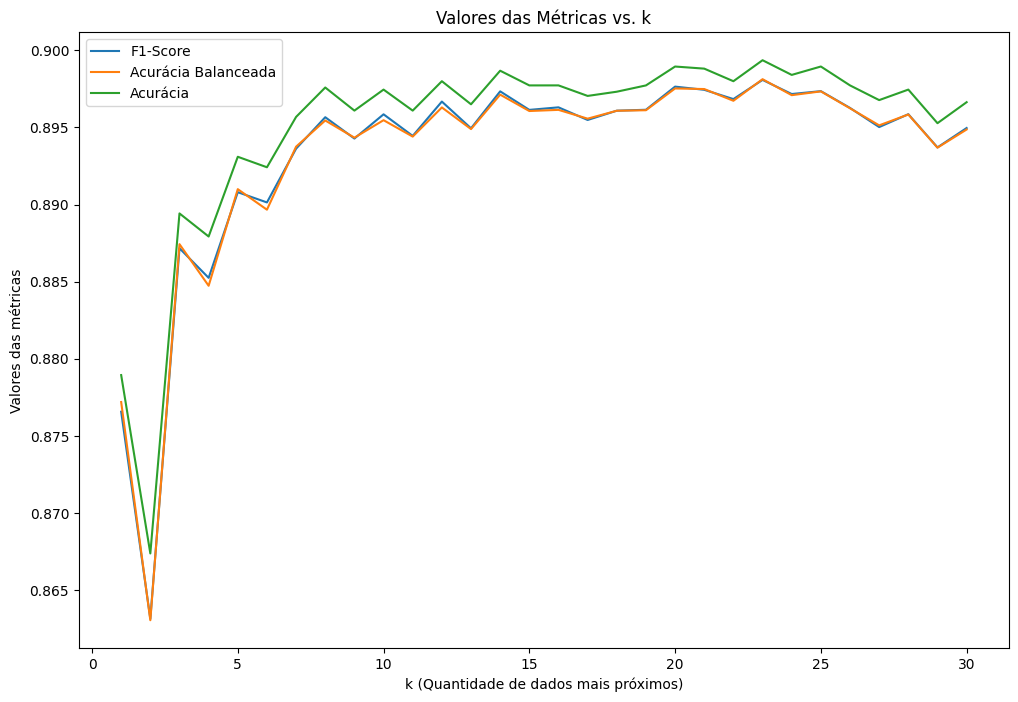

In [26]:
# prompt: plot o gráfico de cada uma das colunas de df_metrics pelo indice+1

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Iterate over the columns of df_metrics, starting from the second column (index 1)
for i in range(0, len(df_metrics.columns)):
  # Plot the values in the current column against the index+1
  plt.plot(range(1, k_max), df_metrics.iloc[:, i], label=df_metrics.columns[i])

# Set the labels and title
plt.xlabel("k (Quantidade de dados mais próximos)")
plt.ylabel("Valores das métricas")
plt.title("Valores das Métricas vs. k")

# Add legend and show the plot
plt.legend(['F1-Score', 'Acurácia Balanceada', 'Acurácia'])
plt.show()


In [13]:
print(np.argmax(df_metrics['accuracy']))
print(metrics[np.argmax(df_metrics['accuracy'])])
print('Best k is: ', np.argmax(df_metrics['accuracy'])+1)

22
[0.8980746975894117, 0.8981199856869406, 0.8993494897959184]
Best k is:  23


In [14]:
best_knn = knn_vector[22]

#best_knn.fit(df_X_train, df_y_train)

# Faz a predição no conjunto de teste
y_pred = best_knn.predict(df_X_test)

# Imprime as predições
print(y_pred)

['5' '5' '5' ... '2' '2' '1']


In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_y_test, y_pred)

print(accuracy)

0.8971835765184933


In [16]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(df_y_test, y_pred)

# Print the confusion matrix
print(cm)

[[490   0   6   0   0   0]
 [ 29 442   0   0   0   0]
 [ 57  55 308   0   0   0]
 [  0   4   0 371 116   0]
 [  0   0   0  33 499   0]
 [  0   0   0   2   1 534]]


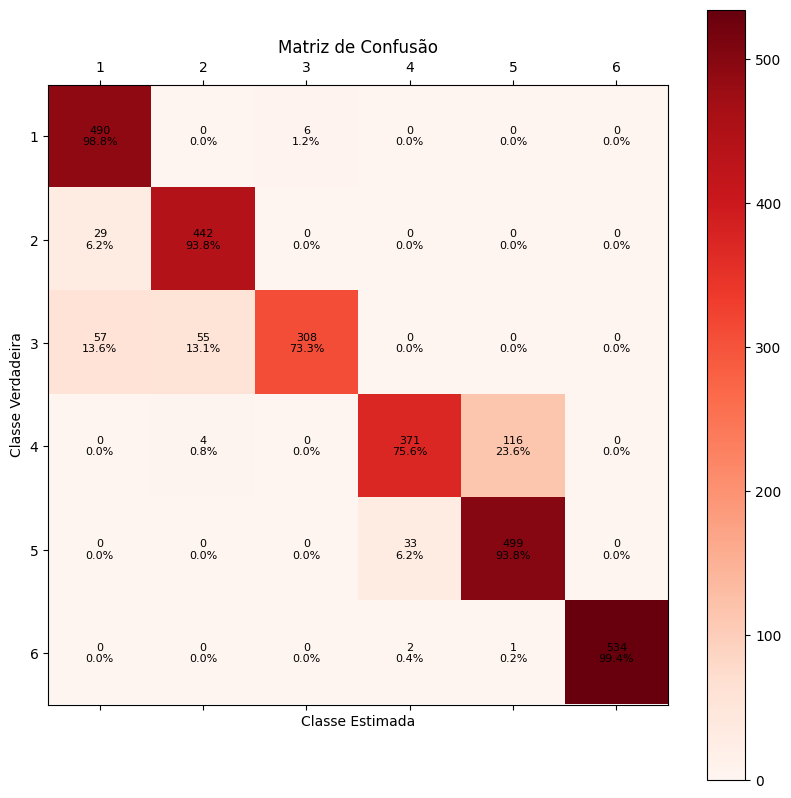

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap and colorbar
cax = ax.matshow(cm, cmap=plt.cm.Reds)
fig.colorbar(cax)
class_labels = [str(i) for i in range(1, 7)]

# Set labels
ax.set(
    title="Matriz de Confusão",
    xlabel="Classe Estimada",
    ylabel="Classe Verdadeira",
    xticks=np.arange(len(class_labels)),
    yticks=np.arange(len(class_labels)),
    xticklabels=class_labels,
    yticklabels=class_labels,
)

# Label each cell with the corresponding value
for (i, j), z in np.ndenumerate(cm_norm):
    ax.text(j, i, f"{cm[i, j]}\n{z * 100:.1f}%", ha="center", va="center", fontsize=8)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [18]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(df_y_test, y_pred, digits=4)

# Print the accuracy, precision, recall, specificity, and F-score
print(report)

              precision    recall  f1-score   support

           1     0.8507    0.9879    0.9142       496
           2     0.8822    0.9384    0.9095       471
           3     0.9809    0.7333    0.8392       420
           4     0.9138    0.7556    0.8272       491
           5     0.8101    0.9380    0.8693       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.8972      2947
   macro avg     0.9063    0.8913    0.8928      2947
weighted avg     0.9047    0.8972    0.8953      2947

